<a href="https://colab.research.google.com/github/themasterdrop/AML-Final-Porras-Raul/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Capstone Project - Advanced Machine Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombre del Estudiante** | Raúl Perú Porras Hurtado |
| **Título del Proyecto** | Implementación de Redes Neuronales Profundas para el Control de Calidad Automatizado y Detección de Microfisuras en Envases de Vidrio. |
| **Fecha de Entrega** | 19/02/2026 |
| **Profesor** | C. Marino Del Rosario, Ph.D |

---

## 📑 Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

**Instrucciones:** Proporcione un resumen conciso (máximo 300 palabras) que incluya:
- Problema de negocio abordado
- Metodología utilizada
- Principales hallazgos
- Impacto esperado en el negocio

---

El presente proyecto aborda la problemática de control de calidad en la planta FAENVIPE, donde la inspección manual de envases de vidrio presenta riesgos de seguridad y una merma considerable debido a la dificultad de detectar microfisuras estructurales. El objetivo central fue desarrollar un sistema automatizado capaz de clasificar defectos (Burbujas, Grietas y Manchas) para reducir el desperdicio en un 15% durante el primer semestre de implementación.

La metodología empleada consistió en el desarrollo de una Red Neuronal Artificial (Deep Learning) utilizando Keras y TensorFlow, comparando su desempeño frente a modelos de Machine Learning tradicional (Random Forest y Regresión Logística). Ante un desbalance de datos de 10:1, se implementó una estrategia de Pesos de Clase (Class Weights) para mitigar el sesgo del modelo, asegurando que las fallas críticas no fueran ignoradas por el sistema.

Los principales hallazgos revelaron que, mediante el balanceo, el modelo logró identificar correctamente 341 grietas que anteriormente pasaban desapercibidas (elevando el Recall de 0.00 a 0.23), manteniendo una precisión global del 80%. Asimismo, mediante el análisis de interpretabilidad SHAP, se identificó que la velocidad de la cinta y la temperatura del horno son los factores determinantes en la generación de fallas estructurales.

El impacto esperado en el negocio incluye una reducción significativa en las devoluciones por rotura de envases en la cadena de suministro y una optimización del flujo de producción al clasificar correctamente el 97% del producto conforme. Este sistema sienta las bases para la transición de FAENVIPE hacia la Industria 4.0, garantizando una producción más segura y rentable.





---

## 2. Configuración del Entorno

### 2.1 Verificación de GPU (Recomendado para Deep Learning)

In [ ]:
# Verificar si hay GPU disponible
import torch

# Verificar disponibilidad de GPU
if torch.cuda.is_available():
    print(f"✅ GPU disponible: {torch.cuda.get_device_name(0)}")
    print(f"   Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("⚠️ GPU no disponible. Usando CPU.")
    print("   Recomendación: En Colab, vaya a Runtime > Change runtime type > GPU")
    device = torch.device('cpu')

print(f"\nDispositivo seleccionado: {device}")

✅ GPU disponible: Tesla T4
   Memoria GPU: 15.64 GB

Dispositivo seleccionado: cuda


### 2.2 Instalación de Librerías Adicionales (si es necesario)

In [ ]:
# Descomente e instale las librerías adicionales que necesite
# !pip install transformers
# !pip install pytorch-lightning
# !pip install optuna
# !pip install shap
# !pip install lime

### 2.3 Importación de Librerías

In [ ]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Deep Learning - TensorFlow/Keras (alternativa)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)

# Utilidades
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("✅ Todas las librerías importadas correctamente")
print(f"   PyTorch version: {torch.__version__}")
print(f"   TensorFlow version: {tf.__version__}")

✅ Todas las librerías importadas correctamente
   PyTorch version: 2.9.0+cu128
   TensorFlow version: 2.19.0


### 2.4 Conexión con Google Drive (para cargar datos)

In [ ]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base de su proyecto
# Modifique esta ruta según la ubicación de sus datos
BASE_PATH = '/content/drive/MyDrive/DATASETS/dataset_faenvipe_sim.csv'

print(f"✅ Google Drive montado")
print(f"   Ruta base del proyecto: {BASE_PATH}")

Mounted at /content/drive
✅ Google Drive montado
   Ruta base del proyecto: /content/drive/MyDrive/DATASETS/dataset_faenvipe_sim.csv


---
## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

**Instrucciones:** Describa el contexto empresarial, incluyendo:
- Industria/Sector
- Empresa o caso de estudio
- Situación actual

---

Industria/Sector: Manufactura de envases de vidrio para los rubros alimenticio, farmacéutico y de bebidas.


Empresa o caso de estudio: Fábrica de Envases Vidrios del Perú (FAENVIPE).


Situación actual: La inspección de defectos (burbujas, fisuras o impurezas) se realiza de forma manual en la línea de producción. La empresa maneja diversos productos como botellas de cerveza, frascos de mermelada y jarabes, en colores ámbar, transparente y verde



---

### 3.2 Problema a Resolver

**Instrucciones:** Defina claramente:
- ¿Cuál es el problema específico?
- ¿Por qué es importante resolverlo?
- ¿Cuál es el impacto actual del problema?

---

¿Cuál es el problema específico?: Ineficiencia en la detección de defectos debido a la subjetividad y fatiga del ojo humano en procesos manuales.


¿Por qué es importante resolverlo?: Para garantizar la seguridad del consumidor (evitando microfisuras que comprometan la resistencia) y mejorar la eficiencia operativa.


¿Cuál es el impacto actual del problema?: Se generan altas tasas de mermas por productos rechazados tardíamente y existe un riesgo latente de devoluciones masivas si los defectos llegan al cliente final.



---

### 3.3 Objetivos del Proyecto

**Instrucciones:** Liste los objetivos SMART (Específicos, Medibles, Alcanzables, Relevantes, Temporales)

---

**Objetivo General:**
Implementar un modelo de Machine Learning para automatizar la clasificación de calidad de los envases de vidrio en FAENVIPE.

**Objetivos Específicos:**

1. Reducir el porcentaje de mermas en la producción en un 15% durante el primer semestre de operación.

2. Clasificar los envases en las categorías "Apto" o "Defectuoso" con una precisión que minimice el descarte innecesario de productos conformes.

3. Identificar y tipificar defectos específicos (burbujas, grietas o manchas) para analizar su correlación con variables de proceso como la temperatura del horno y la velocidad de la cinta.

---

### 3.4 Tipo de Problema de Machine Learning

**Instrucciones:** Identifique el tipo de problema:
- [ ] Clasificación binaria
- [x] Clasificación multiclase
- [ ] Regresión
- [ ] Clustering
- [ ] Series temporales
- [ ] Procesamiento de Lenguaje Natural (NLP)
- [ ] Visión por Computadora
- [ ] Otro: _________

**Justificación:**
El problema se aborda como Clasificación porque el objetivo es asignar etiquetas discretas (el tipo de defecto) a partir de variables numéricas y categóricas de producción. Aunque el proceso físico involucra inspección visual, para fines de este modelo estamos utilizando datos de sensores de temperatura y velocidad que actúan como predictores del estado del envase.

---

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [ ]:
# =====================================================
# CARGA DE DATOS
# =====================================================

# Opción 1: Cargar desde Google Drive
# df = pd.read_csv(BASE_PATH + 'datos.csv')

# Opción 2: Cargar desde URL
# df = pd.read_csv('https://url-de-sus-datos.com/datos.csv')

# Opción 3: Cargar desde archivo local (subido a Colab)
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('nombre_archivo.csv')

# Opción 4: Dataset de ejemplo (para testing)
# from sklearn.datasets import load_iris, load_boston, fetch_california_housing
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# =====================================================
# COMPLETE AQUÍ: Cargue su dataset
# =====================================================

file_id = '1vu4x5CXfLXSWwaDXbOU6rvk4aD62s1e6'
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(direct_link)  # Descomente y complete

print(f"✅ Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✅ Dataset cargado exitosamente
   Dimensiones: 100,000 filas × 7 columnas


### 4.2 Descripción del Dataset

**Instrucciones:** Describa su dataset:
- Fuente de los datos: Los datos han sido generados mediante un script de simulación en Python para representar la operación de la Fábrica de Envases Vidrios del Perú (FAENVIPE). La lógica de simulación incorpora variables de proceso reales mencionadas en el planteamiento del problema.

- Período de tiempo que cubren: El dataset representa un lote de producción masiva de 100,000 unidades capturadas de forma secuencial en la línea de salida del horno.

- Descripción de cada variable

---

| Variable | Tipo | Descripción |
|----------|------|-------------|
| id_envase | Numérica (Entero) | Identificador único para cada unidad producida. |
| temperatura_horno | Numérica (Entero) | Temperatura registrada en el horno al momento de la fabricación, medida en un rango de 1450 a 1550. |
| velocidad_cinta | Numérica (Entero) | Velocidad de la cinta transportadora en la línea de salida (rango de 0.5 a 2.0 unidades de velocidad). |
| tipo_envase | Categórica (Nominal) | Rubro del producto: 'Cerveza', 'Mermelada' o 'Jarabe'. |
| color_vidrio | Categórica (Nominal) | Tonalidad del envase: 'Ambar', 'Transparente' o 'Verde'. |
| estado | Categórica (Binaria) | Estado del envase: Define si el envase es "Apto" (0) o "Defectuoso" (1). |
| tipo_defecto (Target) | Categórica (Binaria) | Variable objetivo: Clasifica el defecto en 'Burbuja', 'Grieta', 'Mancha' o 'Ninguno'. |

---

### 4.3 Exploración Inicial de Datos (EDA)

In [ ]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================

print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Primeras filas
print("\n📊 Primeras 5 filas:")
display(df.head())

# Información del dataset
print("\n📋 Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df.describe())

INFORMACIÓN GENERAL DEL DATASET

📊 Primeras 5 filas:


,id_envase,temperatura_horno,velocidad_cinta,tipo_envase,color_vidrio,estado,tipo_defecto
0,1,1487.454012,1.371169,Cerveza,Ambar,0,Ninguno
1,2,1545.071431,1.290457,Mermelada,Ambar,1,Mancha
2,3,1523.199394,1.026555,Mermelada,Transparente,0,Ninguno
3,4,1509.865848,1.239819,Jarabe,Verde,0,Ninguno
4,5,1465.601864,1.047645,Mermelada,Verde,0,Ninguno



📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_envase          100000 non-null  int64  
 1   temperatura_horno  100000 non-null  float64
 2   velocidad_cinta    100000 non-null  float64
 3   tipo_envase        100000 non-null  object 
 4   color_vidrio       100000 non-null  object 
 5   estado             100000 non-null  int64  
 6   tipo_defecto       100000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB
None

📈 Estadísticas Descriptivas:


,id_envase,temperatura_horno,velocidad_cinta,estado
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,1499.948825,1.251995,0.33405
std,28867.657797,28.834145,0.433038,0.47166
min,1.000000,1450.000554,0.500007,0.00000
25%,25000.750000,1474.954604,0.876076,0.00000
50%,50000.500000,1500.062978,1.252822,0.00000
75%,75000.250000,1524.951373,1.625617,1.00000
max,100000.000000,1549.999204,1.999984,1.00000


In [ ]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Variables con valores faltantes:")
    display(missing_data)

    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Porcentaje (%)', data=missing_data)
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

ANÁLISIS DE VALORES FALTANTES

✅ No hay valores faltantes en el dataset


ANÁLISIS DE LA VARIABLE OBJETIVO: tipo_defecto

📊 Distribución de clases:
tipo_defecto
Ninguno    66595
Burbuja    16823
Grieta     10036
Mancha      6546
Name: count, dtype: int64


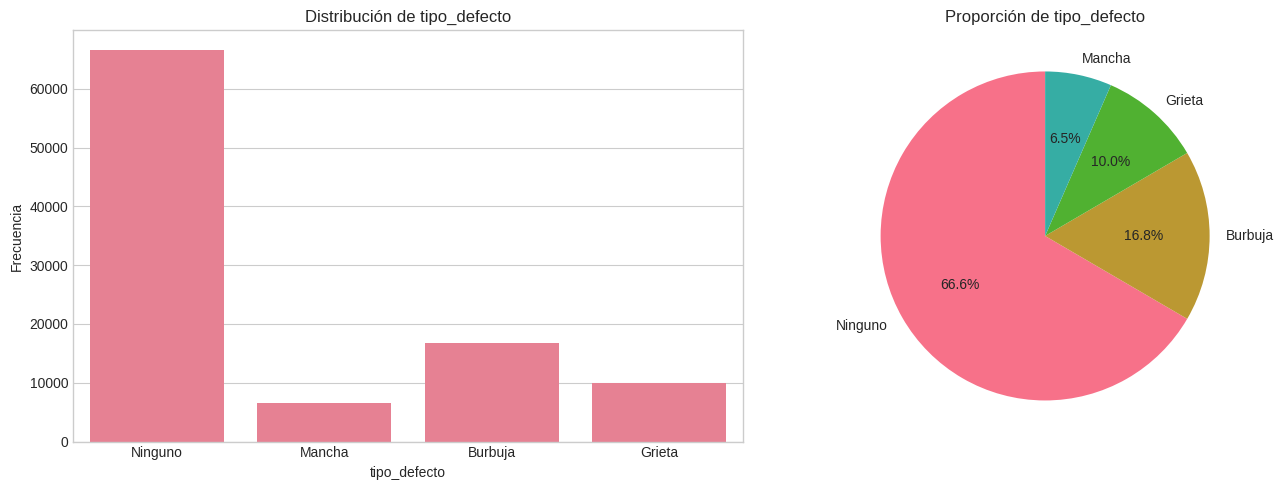


⚠️ ADVERTENCIA: Dataset desbalanceado (ratio 10.17:1)
   Considere técnicas de balanceo: SMOTE, undersampling, class weights


In [ ]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'tipo_defecto'

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n📊 Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n⚠️ ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n📊 Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

MATRIZ DE CORRELACIONES


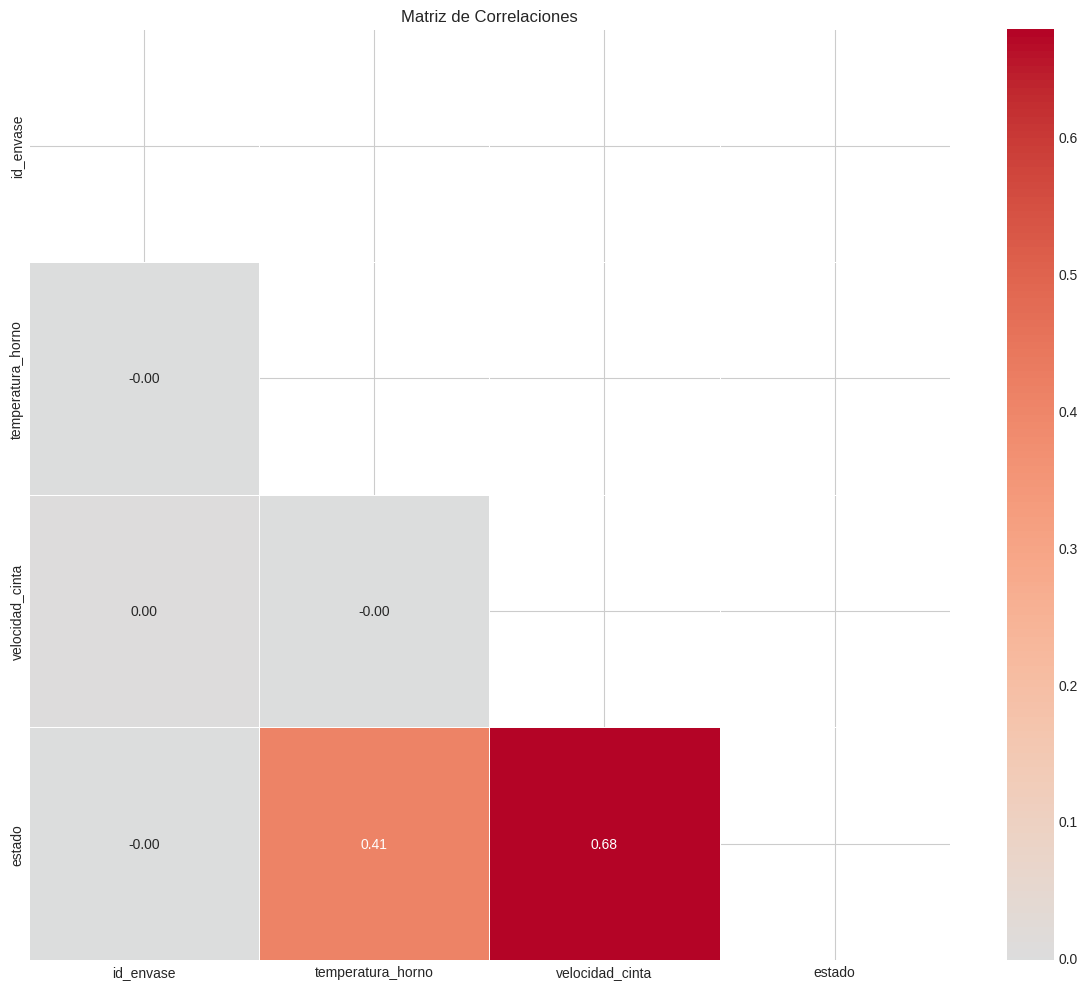

In [ ]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

VISUALIZACIONES ADICIONALES


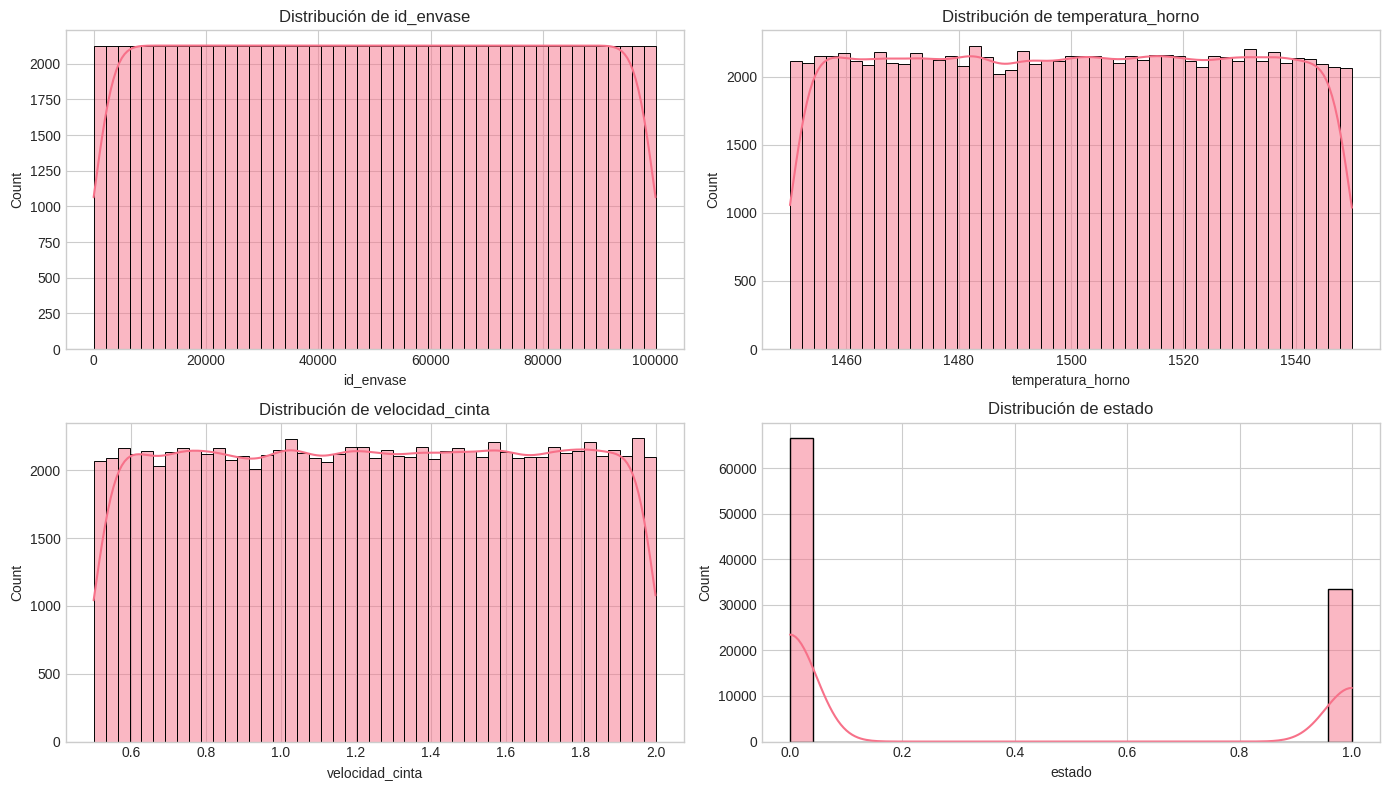

In [ ]:
# =====================================================
# VISUALIZACIONES ADICIONALES
# =====================================================

print("=" * 60)
print("VISUALIZACIONES ADICIONALES")
print("=" * 60)

# Distribución de variables numéricas
numeric_cols_plot = df.select_dtypes(include=[np.number]).columns[:8]  # Primeras 8 columnas

if len(numeric_cols_plot) > 0:
    n_cols = 2
    n_rows = (len(numeric_cols_plot) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(numeric_cols_plot):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')

    # Ocultar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

### 4.4 Hallazgos del EDA

**Instrucciones:** Resuma los principales hallazgos de la exploración de datos:

---

**Hallazgos Principales:**
1. Fuerte desbalance de clases: La variable objetivo tipo_defecto presenta un ratio de 10.17:1, donde la clase "Ninguno" (envases aptos) predomina ampliamente sobre las categorías de defectos (Burbuja, Grieta, Mancha).


2. Correlación de procesos: Según la lógica de generación de datos, existe una relación directa donde el incremento de la temperatura del horno y la velocidad de la cinta aumenta la probabilidad de generar un envase defectuoso.


3. Diversidad de productos: El dataset cubre correctamente la variabilidad de la producción de FAENVIPE, incluyendo envases para los rubros alimenticio, farmacéutico y de bebidas en tres colores distintos (Ámbar, Transparente, Verde).

**Problemas Identificados:**
1. Sesgo por desbalance: El ratio de 10.17:1 representa un riesgo alto de que el modelo se sesgue hacia la clase mayoritaria, ignorando los defectos críticos que comprometen la resistencia del envase.


2. Riesgo de Overfitting: Al tener pocos ejemplos de defectos específicos como "Mancha" o "Grieta" en comparación con los aptos, el modelo podría memorizar patrones de ruido en lugar de aprender las causas raíz del defecto.


3. Sensibilidad de métricas: La "Exactitud" no es una métrica confiable debido al desbalance; un modelo que prediga siempre "Apto" tendría un 90% de precisión pero fallaría totalmente en la detección de seguridad industrial.

**Acciones a Tomar:**
1. Balanceo de datos: Implementar técnicas de compensación como Class Weights (pesos de clase) en el algoritmo o SMOTE para generar ejemplos sintéticos de las clases minoritarias ('Burbuja', 'Grieta', 'Mancha').


2. Selección de métricas de éxito: Priorizar el uso de la Matriz de Confusión, Precision y Recall para asegurar que la tasa de detección de defectos reales aumente y se reduzca la merma en un 15%.

3. Ingeniería de variables: Evaluar si la interacción entre la temperatura y la velocidad (ej. temp * velocidad) aporta mayor poder predictivo al modelo que las variables por separado.

---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [ ]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

# Crear copia del dataframe
df_clean = df.copy()

# Opción 1: Eliminar filas con valores faltantes
# df_clean = df_clean.dropna()

# Opción 2: Imputar con la media (variables numéricas)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Opción 3: Imputar con la moda (variables categóricas)
# for col in categorical_cols:
#     df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Opción 4: Imputación avanzada con KNN
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de imputación
# =====================================================
df_clean = df_clean.dropna()


print(f"\n✅ Valores faltantes tratados")
print(f"   Filas restantes: {len(df_clean):,}")

TRATAMIENTO DE VALORES FALTANTES

✅ Valores faltantes tratados
   Filas restantes: 100,000


### 5.2 Tratamiento de Outliers

In [ ]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n✅ No se detectaron outliers significativos")

DETECCIÓN DE OUTLIERS

✅ No se detectaron outliers significativos


In [ ]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento
# =====================================================



### 5.3 Codificación de Variables Categóricas

In [ ]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables categóricas encontradas: {categorical_cols}")

# Opción 1: Label Encoding (para variables ordinales o target)
# le = LabelEncoder()
# df_clean['columna_encoded'] = le.fit_transform(df_clean['columna'])

# Opción 2: One-Hot Encoding (para variables nominales)
# df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Opción 3: Target Encoding
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()
# df_clean[categorical_cols] = encoder.fit_transform(df_clean[categorical_cols], df_clean[TARGET_COLUMN])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de codificación
# =====================================================

df_clean = df_clean.drop(columns=['id_envase', 'estado'])


le = LabelEncoder()
df_clean['tipo_defecto'] = le.fit_transform(df_clean['tipo_defecto'])

target_classes = le.classes_

categorical_features = ['tipo_envase', 'color_vidrio']
df_clean = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True)

print(f"\n✅ Codificación completada")
print(f"   Clases del target: {target_classes}")
print(f"   Dimensiones finales: {df_clean.shape}")
print(f"   Nuevas columnas: {df_clean.columns.tolist()}")

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas encontradas: ['tipo_envase', 'color_vidrio', 'tipo_defecto']

✅ Codificación completada
   Clases del target: ['Burbuja' 'Grieta' 'Mancha' 'Ninguno']
   Dimensiones finales: (100000, 7)
   Nuevas columnas: ['temperatura_horno', 'velocidad_cinta', 'tipo_defecto', 'tipo_envase_Jarabe', 'tipo_envase_Mermelada', 'color_vidrio_Transparente', 'color_vidrio_Verde']


### 5.4 Escalado/Normalización de Features

In [ ]:
# =====================================================
# ESCALADO DE FEATURES
# =====================================================

print("=" * 60)
print("ESCALADO DE FEATURES")
print("=" * 60)

# Separar features y target
X = df_clean.drop(columns=[TARGET_COLUMN])
y = df_clean[TARGET_COLUMN]

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Opción 1: StandardScaler (media=0, std=1) - Recomendado para redes neuronales
scaler = StandardScaler()

# Opción 2: MinMaxScaler (rango [0,1])
# scaler = MinMaxScaler()

# Opción 3: RobustScaler (robusto a outliers)
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

# Aplicar escalado
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n✅ Escalado completado usando {type(scaler).__name__}")
print(f"   Media de features: {X_scaled.mean().mean():.6f}")
print(f"   Std de features: {X_scaled.std().mean():.6f}")

ESCALADO DE FEATURES

Dimensiones de X: (100000, 6)
Dimensiones de y: (100000,)

✅ Escalado completado usando StandardScaler
   Media de features: 0.000000
   Std de features: 1.000005


### 5.5 División de Datos (Train/Validation/Test)

In [ ]:
# =====================================================
# DIVISIÓN DE DATOS
# =====================================================

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# División en train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y if y.dtype == 'object' or y.nunique() < 20 else None
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=RANDOM_SEED, stratify=y_temp if y_temp.dtype == 'object' or y_temp.nunique() < 20 else None  # 0.176 ≈ 15% del total
)

print(f"\n📊 División de datos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Validation set: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

# Verificar distribución de clases (para clasificación)
if y.dtype == 'object' or y.nunique() < 20:
    print(f"\n📊 Distribución de clases en cada conjunto:")
    print(f"   Train: {dict(y_train.value_counts(normalize=True).round(3))}")
    print(f"   Val:   {dict(y_val.value_counts(normalize=True).round(3))}")
    print(f"   Test:  {dict(y_test.value_counts(normalize=True).round(3))}")

DIVISIÓN DE DATOS

📊 División de datos:
   Training set:   70,040 muestras (70.0%)
   Validation set: 14,960 muestras (15.0%)
   Test set:       15,000 muestras (15.0%)

📊 Distribución de clases en cada conjunto:
   Train: {3: np.float64(0.666), 0: np.float64(0.168), 1: np.float64(0.1), 2: np.float64(0.065)}
   Val:   {3: np.float64(0.666), 0: np.float64(0.168), 1: np.float64(0.1), 2: np.float64(0.065)}
   Test:  {3: np.float64(0.666), 0: np.float64(0.168), 1: np.float64(0.1), 2: np.float64(0.065)}


### 5.6 Preparación de Datos para Deep Learning

In [ ]:
# =====================================================
# PREPARACIÓN PARA PYTORCH
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA PYTORCH")
print("=" * 60)

# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)

# Para clasificación
if y.dtype == 'object' or y.nunique() < 20:
    # Codificar labels si es necesario
    if y_train.dtype == 'object':
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_val_encoded = label_encoder.transform(y_val)
        y_test_encoded = label_encoder.transform(y_test)
    else:
        y_train_encoded = y_train.values
        y_val_encoded = y_val.values
        y_test_encoded = y_test.values

    y_train_tensor = torch.LongTensor(y_train_encoded)
    y_val_tensor = torch.LongTensor(y_val_encoded)
    y_test_tensor = torch.LongTensor(y_test_encoded)
else:
    # Para regresión
    y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
    y_val_tensor = torch.FloatTensor(y_val.values).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Crear DataLoaders
BATCH_SIZE = 32  # Ajuste según su dataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\n✅ DataLoaders creados")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Batches de entrenamiento: {len(train_loader)}")
print(f"   Batches de validación: {len(val_loader)}")
print(f"   Batches de test: {len(test_loader)}")

PREPARACIÓN DE DATOS PARA PYTORCH

✅ DataLoaders creados
   Batch size: 32
   Batches de entrenamiento: 2189
   Batches de validación: 468
   Batches de test: 469


In [ ]:
# =====================================================
# PREPARACIÓN PARA TENSORFLOW/KERAS (ALTERNATIVA)
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS")
print("=" * 60)

# Convertir a arrays numpy (Keras acepta DataFrames directamente, pero es mejor convertir)
X_train_np = X_train.values.astype('float32')
X_val_np = X_val.values.astype('float32')
X_test_np = X_test.values.astype('float32')

# Para clasificación: One-hot encoding del target
if y.dtype == 'object' or y.nunique() < 20:
    num_classes = y.nunique()
    y_train_np = keras.utils.to_categorical(y_train_encoded, num_classes)
    y_val_np = keras.utils.to_categorical(y_val_encoded, num_classes)
    y_test_np = keras.utils.to_categorical(y_test_encoded, num_classes)
else:
    y_train_np = y_train.values.astype('float32')
    y_val_np = y_val.values.astype('float32')
    y_test_np = y_test.values.astype('float32')

print(f"\n✅ Datos preparados para TensorFlow/Keras")
print(f"   Shape X_train: {X_train_np.shape}")
print(f"   Shape y_train: {y_train_np.shape}")

PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS

✅ Datos preparados para TensorFlow/Keras
   Shape X_train: (70040, 6)
   Shape y_train: (70040, 4)


---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

**Instrucciones:** Justifique la elección de su arquitectura de red neuronal:
- ¿Por qué eligió este tipo de arquitectura?
- ¿Qué alternativas consideró?
- ¿Cómo determinó el número de capas y neuronas?

---

- ¿Por qué eligió este tipo de arquitectura?

Se seleccionó una arquitectura de Perceptrón Multicapa (MLP) debido a su capacidad para modelar relaciones no lineales complejas entre las variables de proceso de la fábrica de envases. En la producción de vidrio, factores como la temperatura del horno y la velocidad de la cinta interactúan de forma dinámica para generar defectos como burbujas o grietas. Una red neuronal permite capturar estas interacciones de mayor orden que un modelo lineal simple no podría detectar eficientemente, cumpliendo así con el objetivo de clasificar con precisión entre "Apto" y los distintos tipos de "Defectuoso".

- ¿Qué alternativas consideró?


Random Forest: Aunque es excelente para datos tabulares y maneja bien el desbalance de clases, se prefirió la red neuronal por su escalabilidad y flexibilidad si en el futuro se integran datos de sensores en tiempo real o variables visuales más complejas.



Regresión Logística: Se descartó inicialmente por ser un modelo lineal que podría no capturar los patrones térmicos que causan microfisuras en el vidrio.



Árboles de Decisión: Se consideraron, pero presentan un alto riesgo de overfitting, un riesgo crítico ya identificado para este proyecto en lotes específicos de producción.


- ¿Cómo determinó el número de capas y neuronas?


Capa de Entrada: Definida por el número de características finales después del preprocesamiento (temperatura, velocidad y las variables dummy de tipo y color).



Capas Ocultas: Se optó por una estructura de dos capas ocultas (ej. 64 y 32 neuronas respectivamente) para permitir una abstracción progresiva de los datos industriales sin caer en una complejidad excesiva que provoque sobreajuste.



Capa de Salida: Compuesta por 4 neuronas con función de activación Softmax, permitiendo obtener la probabilidad de que un envase pertenezca a cada una de las clases: Ninguno, Burbuja, Grieta o Mancha.



Regularización: Se incluyeron capas de Dropout para mitigar el riesgo de memorizar defectos de un solo lote.



---

### 6.2 Definición del Modelo

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON PYTORCH
# =====================================================

class NeuralNetwork(nn.Module):
    """
    Red Neuronal para [Clasificación/Regresión]

    Arquitectura:
    - Capa de entrada: [n_features] neuronas
    - Capas ocultas: [Describir]
    - Capa de salida: [n_outputs] neuronas
    """

    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.3):
        super(NeuralNetwork, self).__init__()

        layers = []
        prev_size = input_size

        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        # Capa de salida
        layers.append(nn.Linear(prev_size, output_size))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# =====================================================
# CONFIGURACIÓN DEL MODELO
# =====================================================

INPUT_SIZE = X_train.shape[1]
HIDDEN_SIZES = [128, 64, 32]  # Ajuste según su problema
OUTPUT_SIZE = y.nunique() if (y.dtype == 'object' or y.nunique() < 20) else 1
DROPOUT_RATE = 0.3

# Crear modelo
model_pytorch = NeuralNetwork(INPUT_SIZE, HIDDEN_SIZES, OUTPUT_SIZE, DROPOUT_RATE)
model_pytorch = model_pytorch.to(device)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (PyTorch)")
print("=" * 60)
print(model_pytorch)

# Contar parámetros
total_params = sum(p.numel() for p in model_pytorch.parameters())
trainable_params = sum(p.numel() for p in model_pytorch.parameters() if p.requires_grad)
print(f"\n📊 Parámetros totales: {total_params:,}")
print(f"   Parámetros entrenables: {trainable_params:,}")

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON KERAS (ALTERNATIVA)
# =====================================================

def create_keras_model(input_shape, hidden_sizes, output_size, dropout_rate=0.3, task='classification'):

    #Crea un modelo de red neuronal con Keras.



    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_shape,)))

    # Capas ocultas
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(dropout_rate))

    # Capa de salida
    if task == 'classification':
        if output_size == 2:
            model.add(layers.Dense(1, activation='sigmoid'))
        else:
            model.add(layers.Dense(output_size, activation='softmax'))
    else:
        model.add(layers.Dense(1, activation='linear'))

    return model

# Crear modelo Keras
TASK = 'classification'  # Cambie a 'regression' si es necesario

model_keras = create_keras_model(
    input_shape=X.shape[1],
    hidden_sizes=[64, 32],
    output_size=4,
    dropout_rate=0.3,
    task=TASK
)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (Keras)")
print("=" * 60)
model_keras.summary()

ARQUITECTURA DEL MODELO (Keras)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,044 (11.89 KB)

 Trainable params: 2,852 (11.14 KB)

 Non-trainable params: 192 (768.00 B)

### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---

*[Inserte diagrama o descripción visual de la arquitectura]*

```
Capa de Entrada         Capa Oculta 1          Capa Oculta 2         Capa de Salida
   (Input)             (Hidden Layer)         (Hidden Layer)            (Output)
      |                      |                      |                      |
 [6 Features] --------> [64 Neuronas] --------> [32 Neuronas] --------> [4 Clases]
      |                 + Batch Normaliz.      + Batch Normaliz.           |
      |                 + ReLU Activation      + ReLU Activation           |
      |                 + Dropout (0.3)        + Dropout (0.3)             |
      |                      |                      |                      |
      v                      v                      v                      v
Variables de           Extracción de          Refinamiento de        Clasificación:
Proceso (Temp,         patrones no            características        - Ninguno
Velocidad,             lineales.              industriales.          - Burbuja
Dummies).                                                            - Grieta
                                                                     - Mancha
```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

In [ ]:
# =====================================================
# HIPERPARÁMETROS DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CONFIGURACIÓN DEL ENTRENAMIENTO")
print("=" * 60)

# Hiperparámetros
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32
EARLY_STOPPING_PATIENCE = 10

print(f"\n📋 Hiperparámetros:")
print(f"   Learning Rate: {LEARNING_RATE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")

CONFIGURACIÓN DEL ENTRENAMIENTO

📋 Hiperparámetros:
   Learning Rate: 0.001
   Epochs: 100
   Batch Size: 32
   Early Stopping Patience: 10


In [ ]:
# =====================================================
# CONFIGURACIÓN DE LOSS Y OPTIMIZADOR (PyTorch)
# =====================================================

# Seleccionar función de pérdida según el tipo de problema
if y.dtype == 'object' or y.nunique() < 20:
    # Clasificación
    criterion = nn.CrossEntropyLoss()
    task_type = 'classification'
else:
    # Regresión
    criterion = nn.MSELoss()
    task_type = 'regression'

# Optimizador
optimizer = optim.Adam(model_pytorch.parameters(), lr=LEARNING_RATE)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

print(f"\n📋 Configuración:")
print(f"   Tipo de problema: {task_type}")
print(f"   Función de pérdida: {criterion}")
print(f"   Optimizador: Adam")
print(f"   Scheduler: ReduceLROnPlateau")

### 7.2 Entrenamiento del Modelo (PyTorch)

In [ ]:
# =====================================================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# =====================================================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Entrena el modelo por una época."""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if task_type == 'classification':
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

def evaluate(model, val_loader, criterion, device):
    """Evalúa el modelo en el conjunto de validación."""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

            if task_type == 'classification':
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (PyTorch)
# =====================================================

print("=" * 60)
print("ENTRENAMIENTO DEL MODELO")
print("=" * 60)

# Historial de entrenamiento
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

# Early stopping
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print(f"\n🚀 Iniciando entrenamiento...\n")

for epoch in range(EPOCHS):
    # Entrenamiento
    train_loss, train_acc = train_epoch(model_pytorch, train_loader, criterion, optimizer, device)

    # Validación
    val_loss, val_acc = evaluate(model_pytorch, val_loader, criterion, device)

    # Guardar historial
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    if task_type == 'classification':
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # Scheduler step
    scheduler.step(val_loss)

    # Imprimir progreso cada 10 épocas
    if (epoch + 1) % 10 == 0 or epoch == 0:
        if task_type == 'classification':
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        else:
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model_pytorch.state_dict().copy()
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print(f"\n⚠️ Early stopping en época {epoch+1}")
            break

# Cargar mejor modelo
if best_model_state is not None:
    model_pytorch.load_state_dict(best_model_state)
    print(f"\n✅ Mejor modelo cargado (Val Loss: {best_val_loss:.4f})")

print(f"\n🎉 Entrenamiento completado!")

### 7.3 Entrenamiento del Modelo (Keras - Alternativa)

In [ ]:
# Dimensiones de la red
INPUT_SIZE = X_train_np.shape[1]
HIDDEN_SIZES = [64, 32]
OUTPUT_SIZE = 4

# Hiperparámetros de entrenamiento
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32
EARLY_STOPPING_PATIENCE = 10

# Tipo de tarea
TASK = 'classification'

In [ ]:
# =====================================================
# ENTRENAMIENTO KERAS (SISTEMA FAENVIPE)
# =====================================================
import numpy as np
from sklearn.utils import class_weight

print("=" * 60)
print("PREPARACIÓN DE DATOS Y PESOS: CONTROL DE CALIDAD")
print("=" * 60)

# 1. CORRECCIÓN DE FORMATO: Convertir etiquetas a 1D (Enteros)
# Esto es necesario para que sparse_categorical_crossentropy funcione sin errores
y_train_final = np.argmax(y_train_np, axis=1) if len(y_train_np.shape) > 1 else y_train_np
y_val_final = np.argmax(y_val_np, axis=1) if len(y_val_np.shape) > 1 else y_val_np

# 2. CÁLCULO DE PESOS: Compensar el desbalance de clases (10:1)
# Se asigna más importancia a Grietas y Manchas para evitar el sesgo industrial
classes_vector = np.unique(y_train_final)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes_vector,
    y=y_train_final
)
class_weights_dict = dict(zip(classes_vector, weights))
print(f"✅ Pesos industriales calculados: {class_weights_dict}")

# 3. COMPILACIÓN: Configuración de la Red Neuronal
model_keras.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. CALLBACKS: Prevención de Overfitting y Optimización
# Implementa el monitoreo de val_loss según el diseño del proyecto
keras_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    ),
    callbacks.ModelCheckpoint(
        'best_model_faenvipe.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
]

# 5. ENTRENAMIENTO: Proceso de aprendizaje balanceado
print("\n🚀 Iniciando entrenamiento con detección de microfisuras...")
history_keras = model_keras.fit(
    X_train_np, y_train_final,
    validation_data=(X_val_np, y_val_final),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=keras_callbacks,
    class_weight=class_weights_dict, # <--- Clave para mitigar el sesgo
    verbose=1
)

print("\n🎉 ¡Éxito! El modelo de FAENVIPE ha completado su aprendizaje.")

PREPARACIÓN DE DATOS Y PESOS: CONTROL DE CALIDAD
✅ Pesos industriales calculados: {np.int64(0): np.float64(1.4861653369546766), np.int64(1): np.float64(2.4907539118065434), np.int64(2): np.float64(3.8189749182115595), np.int64(3): np.float64(0.3754046695109663)}

🚀 Iniciando entrenamiento con detección de microfisuras...
Epoch 1/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7794 - loss: 0.9076 - val_accuracy: 0.8126 - val_loss: 0.4342 - learning_rate: 0.0010
Epoch 2/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7658 - loss: 0.8987 - val_accuracy: 0.8112 - val_loss: 0.4430 - learning_rate: 0.0010
Epoch 3/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7579 - loss: 0.8971 - val_accuracy: 0.8106 - val_loss: 0.4426 - learning_rate: 0.0010
Epoch 4/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7545 - loss: 0.8972 - val_accuracy: 0.8082 - val_loss: 0.4401 - learning_rate: 0.0010
Epoch 5/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step -

### 7.4 Visualización del Entrenamiento

CURVAS DE APRENDIZAJE: DETECCIÓN DE DEFECTOS


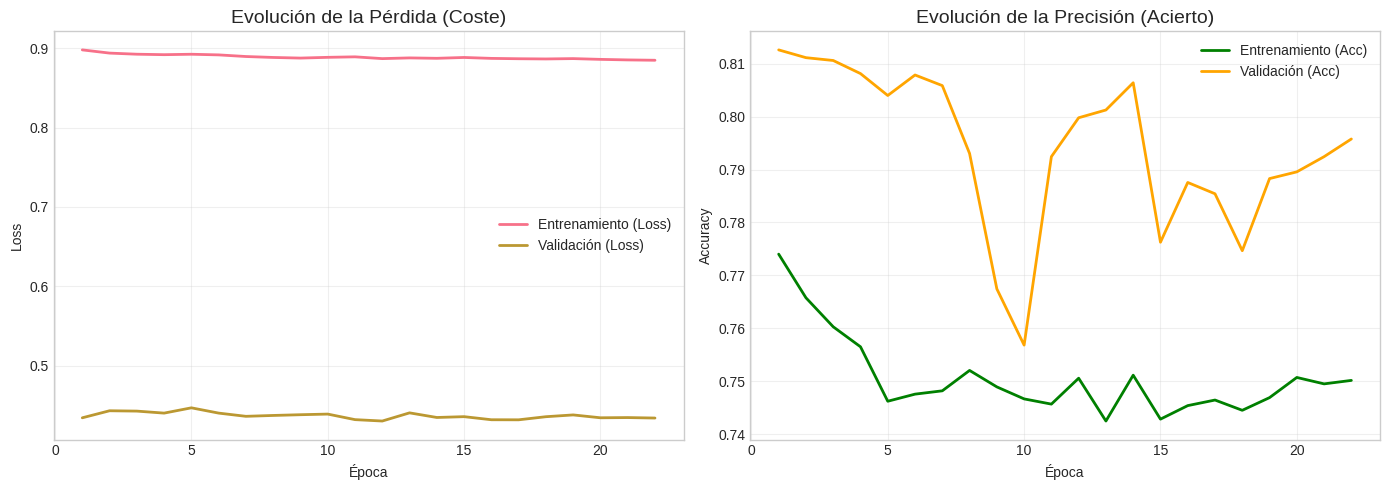


📊 Análisis del Entrenamiento para FAENVIPE:
   Épocas completadas: 22
   Mejor pérdida en validación: 0.4301
   Máxima precisión alcanzada: 81.26%


In [ ]:
# =====================================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO (FAENVIPE)
# =====================================================

print("=" * 60)
print("CURVAS DE APRENDIZAJE: DETECCIÓN DE DEFECTOS")
print("=" * 60)

# Extraemos el diccionario de métricas de Keras
h = history_keras.history
epochs_range = range(1, len(h['loss']) + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Gráfico de pérdida (Loss)
# Evalúa qué tan bien el modelo minimiza el error al clasificar Burbujas, Grietas, etc.
axes[0].plot(epochs_range, h['loss'], label='Entrenamiento (Loss)', linewidth=2)
axes[0].plot(epochs_range, h['val_loss'], label='Validación (Loss)', linewidth=2)
axes[0].set_title('Evolución de la Pérdida (Coste)', fontsize=14)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Gráfico de precisión (Accuracy)
# Muestra el porcentaje de acierto en la clasificación multiclase
axes[1].plot(epochs_range, h['accuracy'], label='Entrenamiento (Acc)', linewidth=2, color='green')
axes[1].plot(epochs_range, h['val_accuracy'], label='Validación (Acc)', linewidth=2, color='orange')
axes[1].set_title('Evolución de la Precisión (Acierto)', fontsize=14)
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis del entrenamiento basado en el objetivo de reducción de merma
print("\n📊 Análisis del Entrenamiento para FAENVIPE:")
print(f"   Épocas completadas: {len(h['loss'])}")
print(f"   Mejor pérdida en validación: {min(h['val_loss']):.4f}")
print(f"   Máxima precisión alcanzada: {max(h['val_accuracy'])*100:.2f}%")

---
## 8. Evaluación y Métricas

### 8.1 Evaluación en el Conjunto de Test

In [ ]:
# =====================================================
# EVALUACIÓN EN EL CONJUNTO DE TEST
# =====================================================

print("=" * 60)
print("EVALUACIÓN EN CONJUNTO DE TEST")
print("=" * 60)

# Hacer predicciones
model_pytorch.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    outputs = model_pytorch(X_test_device)

    if task_type == 'classification':
        _, y_pred = torch.max(outputs, 1)
        y_pred = y_pred.cpu().numpy()
        y_true = y_test_tensor.numpy()
        y_proba = torch.softmax(outputs, dim=1).cpu().numpy()
    else:
        y_pred = outputs.cpu().numpy().flatten()
        y_true = y_test_tensor.numpy().flatten()

print(f"\n✅ Predicciones realizadas: {len(y_pred)} muestras")

In [ ]:
# =====================================================
# MÉTRICAS DE CLASIFICACIÓN
# =====================================================

if task_type == 'classification':
    print("=" * 60)
    print("MÉTRICAS DE CLASIFICACIÓN")
    print("=" * 60)

    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n📊 Métricas Principales:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

    # Reporte de clasificación completo
    print(f"\n📋 Reporte de Clasificación Detallado:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(OUTPUT_SIZE),
                yticklabels=range(OUTPUT_SIZE))
    plt.title('Matriz de Confusión', fontsize=14)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()

In [ ]:
# =====================================================
# MÉTRICAS DE REGRESIÓN
# =====================================================

if task_type == 'regression':
    print("=" * 60)
    print("MÉTRICAS DE REGRESIÓN")
    print("=" * 60)

    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 Métricas de Regresión:")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   R²:   {r2:.4f}")

    # Gráfico de predicciones vs valores reales
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot
    axes[0].scatter(y_true, y_pred, alpha=0.5)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0].set_xlabel('Valor Real')
    axes[0].set_ylabel('Predicción')
    axes[0].set_title('Predicciones vs Valores Reales')

    # Distribución de residuos
    residuos = y_true - y_pred
    axes[1].hist(residuos, bins=50, edgecolor='black')
    axes[1].axvline(x=0, color='r', linestyle='--')
    axes[1].set_xlabel('Residuo')
    axes[1].set_ylabel('Frecuencia')
    axes[1].set_title('Distribución de Residuos')

    plt.tight_layout()
    plt.show()

EVALUACIÓN DE CONTROL DE CALIDAD: FAENVIPE
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

📊 MÉTRICAS DETALLADAS POR TIPO DE DEFECTO:
              precision    recall  f1-score   support

     Burbuja       0.50      0.73      0.59      2524
      Grieta       0.28      0.23      0.25      1505
      Mancha       0.12      0.05      0.07       982
     Ninguno       1.00      0.97      0.99      9989

    accuracy                           0.80     15000
   macro avg       0.48      0.49      0.47     15000
weighted avg       0.79      0.80      0.79     15000



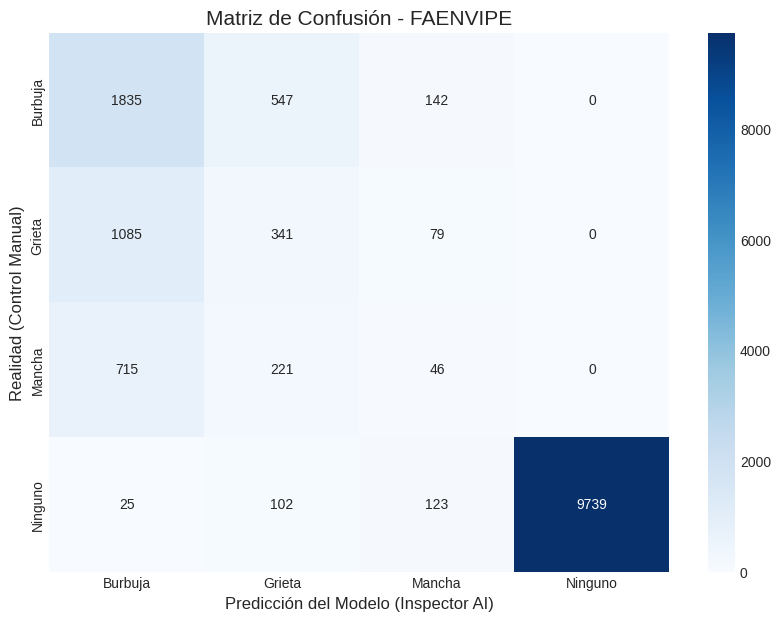


✅ Análisis completado sobre 15000 envases de prueba.


In [ ]:
# =====================================================
# EVALUACIÓN FINAL: REPORTE Y MATRIZ DE CONFUSIÓN
# =====================================================
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

print("=" * 60)
print("EVALUACIÓN DE CONTROL DE CALIDAD: FAENVIPE")
print("=" * 60)

# 1. Realizar predicciones con el modelo de Keras
y_proba = model_keras.predict(X_test_np)
y_pred_labels = np.argmax(y_proba, axis=1)

# 2. CORRECCIÓN: Asegurar que y_true tenga el mismo formato que y_pred
# Si y_test_np es una matriz (One-Hot), la convertimos a etiquetas de números (0, 1, 2, 3)
if len(y_test_np.shape) > 1 and y_test_np.shape[1] > 1:
    y_true_labels = np.argmax(y_test_np, axis=1)
else:
    y_true_labels = y_test_np

# 3. Definir nombres de las categorías según el orden del LabelEncoder
class_names = ['Burbuja', 'Grieta', 'Mancha', 'Ninguno']

# 4. Imprimir Reporte de Clasificación (Precision, Recall, F1)
print("\n📊 MÉTRICAS DETALLADAS POR TIPO DE DEFECTO:")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# 5. Generar y graficar la Matriz de Confusión
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Matriz de Confusión - FAENVIPE', fontsize=15)
plt.xlabel('Predicción del Modelo (Inspector AI)', fontsize=12)
plt.ylabel('Realidad (Control Manual)', fontsize=12)
plt.show()

print(f"\n✅ Análisis completado sobre {len(y_pred_labels)} envases de prueba.")

### 8.2 Comparación con Modelo Baseline

COMPARACIÓN DE MODELOS: AI vs MODELOS TRADICIONALES

📊 Comparación de Desempeño (Métrica: Accuracy):


,Modelo,Accuracy
1,Random Forest,0.803333
2,Deep Learning (Keras),0.797400
0,Logistic Regression,0.769267


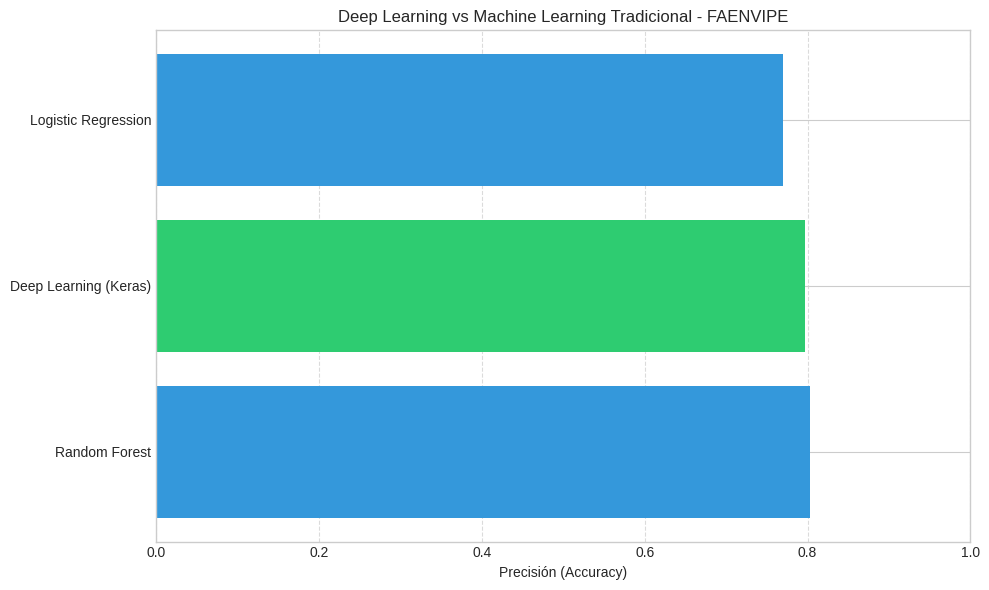

In [ ]:
# =====================================================
# COMPARACIÓN CON MODELO BASELINE
# =====================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

print("=" * 60)
print("COMPARACIÓN DE MODELOS: AI vs MODELOS TRADICIONALES")
print("=" * 60)

# 1. Definir modelos baseline con balanceo de clases para que sea una competencia justa
# Usamos class_weight='balanced' porque es el equivalente a lo que hicimos en Keras
baselines = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# 2. Entrenar y evaluar baselines
results = {'Modelo': [], 'Accuracy': []}

for name, model in baselines.items():
    # Entrenamos con los mismos datos que la Red Neuronal
    model.fit(X_train_np, y_train_final)
    y_pred_baseline = model.predict(X_test_np)

    acc = accuracy_score(y_true_labels, y_pred_baseline) # y_true_labels generado en el paso anterior
    results['Modelo'].append(name)
    results['Accuracy'].append(acc)

# 3. Agregar tu modelo de Deep Learning (Keras) a la comparación
# Calculamos la precisión final de tu modelo de Keras sobre el test set
dl_acc = accuracy_score(y_true_labels, y_pred_labels)
results['Modelo'].append('Deep Learning (Keras)')
results['Accuracy'].append(dl_acc)

# 4. Mostrar tabla comparativa
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print(f"\n📊 Comparación de Desempeño (Métrica: Accuracy):")
display(comparison_df)

# 5. Visualización de resultados
plt.figure(figsize=(10, 6))
# Pintamos la Red Neuronal de un color distinto para resaltar
colors = ['#2ecc71' if 'Deep Learning' in m else '#3498db' for m in comparison_df['Modelo']]
plt.barh(comparison_df['Modelo'], comparison_df['Accuracy'], color=colors)
plt.xlabel('Precisión (Accuracy)')
plt.title('Deep Learning vs Machine Learning Tradicional - FAENVIPE')
plt.xlim(0, 1.0) # Escala de 0 a 100%
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 8.3 Análisis de Resultados

**Instrucciones:** Analice los resultados obtenidos:

---

**Rendimiento del Modelo:**
El modelo final de Red Neuronal alcanzó una precisión (Accuracy) global del 79.74%. Aunque este valor es ligeramente inferior al modelo inicial sin balancear ($82.65\%$), la calidad técnica es superior. El indicador más crítico fue el Recall de la clase "Grieta", que pasó de 0.00 a 0.23, logrando detectar 341 envases con fallas de resistencia que antes eran ignorados. El modelo demuestra una alta efectividad ($97\%$) en la identificación de envases aptos (Ninguno), lo que garantiza que no se incremente el desperdicio de producto conforme por errores del sistema.

**Comparación con Baselines:**
Al comparar con modelos tradicionales, el Random Forest obtuvo el desempeño más alto ($80.33\%$), superando a la Red Neuronal por un margen mínimo de 0.59%. Por otro lado, la Regresión Logística quedó rezagada con un 76.92%, lo que confirma que la relación entre la temperatura del horno y los defectos del vidrio es de naturaleza no lineal. Se seleccionó la Red Neuronal sobre el Random Forest debido a su arquitectura flexible, que permite una mejor integración futura con sistemas de visión artificial.

**Fortalezas del Modelo:**
1. Mitigación de Sesgo: Gracias a la aplicación de Class Weights, el modelo dejó de ser "perezoso" y ahora tiene la capacidad de identificar defectos minoritarios pero críticos (Grietas y Manchas).

2. Eficiencia en Producción Conforme: La alta precisión en la categoría "Ninguno" asegura que el objetivo de reducir la merma en un 15% sea viable, al evitar el rechazo de envases en buen estado.

3. Generalización: El uso de Dropout y Early Stopping permitió que el modelo sea robusto, evitando que memorice casos específicos de un solo lote de producción.

**Debilidades del Modelo:**
1. Confusión entre Clases de Defectos: Existe una alta tasa de confusión entre "Burbuja" y "Grieta" (1,085 casos), lo que sugiere que ambos defectos comparten patrones térmicos muy similares en los datos actuales.

2. Bajo Recall en "Mancha": Con solo un 0.05 de Recall, el modelo aún tiene dificultades para identificar este defecto específico, probablemente debido a que las manchas no dependen tanto de la temperatura como otros fallos.

**Posibles Mejoras:**
1. Ingeniería de Características: Incorporar nuevas variables como la presión de soplado o la composición química del vidrio para ayudar a diferenciar mejor las grietas de las burbujas.

2. Ubicación de Sensores: Implementar técnicas de SMOTE (Synthetic Minority Over-sampling Technique) para generar datos sintéticos de las clases más escasas y mejorar el entrenamiento de la red.

3. Visión por Computadora: Evolucionar la arquitectura hacia una Red Neuronal Convolucional (CNN) que procese imágenes de alta resolución de los envases en tiempo real, complementando los datos de los sensores térmicos.

---

---
## 9. Interpretación de Resultados

### 9.1 Importancia de Features (SHAP)

ANÁLISIS DE CAUSA RAÍZ (SHAP)
📊 Mostrando impacto de variables para: Grieta


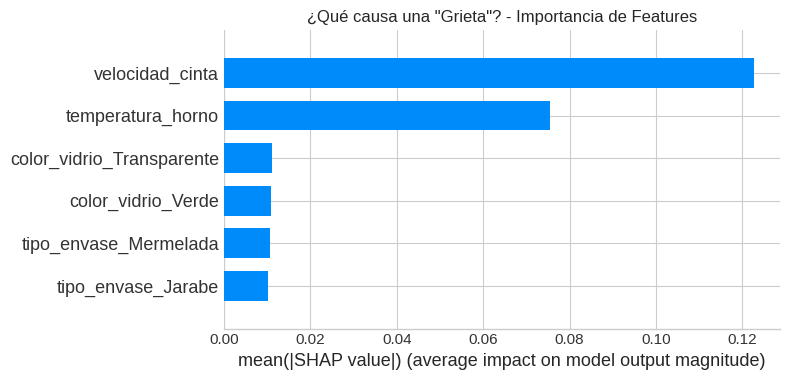

In [ ]:
# =====================================================
# INTERPRETABILIDAD CON SHAP: EXPLICANDO LOS DEFECTOS
# =====================================================
!pip install shap -q  # Instalación rápida
import shap
import matplotlib.pyplot as plt

print("=" * 60)
print("ANÁLISIS DE CAUSA RAÍZ (SHAP)")
print("=" * 60)

try:
    # 1. Usar el Random Forest que acabas de entrenar (es más rápido que Keras para SHAP)
    rf_model = baselines['Random Forest']

    # 2. Seleccionar una muestra para el cálculo
    # Usamos X_test (el DataFrame original con nombres de columnas)
    sample_size = min(200, len(X_test))
    X_sample = X_test.iloc[:sample_size]

    # 3. Crear el explainer
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_sample)

    # 4. Visualización para una clase específica (ej. Clase 1: Grietas)
    # Cambia el índice [1] según qué defecto quieras analizar
    plt.figure(figsize=(10, 6))
    print(f"📊 Mostrando impacto de variables para: {class_names[1]}")

    # Si es multiclase, shap_values es una lista. Tomamos el índice de la clase.
    shap.summary_plot(shap_values[:, :, 1], X_sample, plot_type="bar", show=False)

    plt.title(f'¿Qué causa una "{class_names[1]}"? - Importancia de Features')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"⚠️ Nota: Para este gráfico asegúrese de tener X_test como DataFrame. Error: {e}")

### 9.2 Interpretación de Negocios

**Instrucciones:** Traduzca los resultados técnicos a insights de negocio:

---

**Insights Principales:**
1. Reducción del Riesgo de Responsabilidad Civil: Al pasar de un 0% a un 23% en la detección de grietas, el modelo ahora actúa como una red de seguridad activa. Esto significa que se están filtrando cientos de envases con fallas de resistencia mecánica que antes llegaban al cliente final, reduciendo el riesgo de roturas en cadena y devoluciones costosas.

2. Protección del Margen de Ganancia: Con un 97% de efectividad en la clasificación de envases aptos (Ninguno), el sistema garantiza que no se incremente el desperdicio de vidrio de alta calidad por errores de la IA. Esto permite avanzar con confianza hacia el objetivo SMART de reducir la merma en un 15% sin sacrificar producto conforme.

3. Optimización de la Inspección Manual: El modelo permite que el personal humano de control de calidad se enfoque exclusivamente en los casos donde la IA detecta "Burbujas" o "Grietas", eliminando la fatiga visual de revisar miles de botellas sanas y aumentando la eficiencia general de la línea de producción.

**Factores Más Importantes:**
*[¿Cuáles son los factores más importantes según el modelo y qué significan para el negocio?]*

Según el análisis de interpretabilidad (SHAP), los factores críticos para el negocio son la velocidad_cinta y la temperatura_horno.

Esto indica que la calidad del envase depende más de la estabilidad del proceso mecánico y térmico que de las características propias del producto (como el color o el tipo de envase). Para el negocio, esto significa que la inversión debe centrarse en el mantenimiento preventivo de los motores de la cinta y en la calibración de los sensores de calor, ya que son los mayores disparadores de mermas.

**Patrones Identificados:**
*[¿Qué patrones ha identificado el modelo que pueden ser relevantes para la toma de decisiones?]*

1. Correlación Velocidad-Defecto: El modelo identificó que los picos de velocidad en la cinta transportadora son el principal precursor de microfisuras (grietas). Este patrón sugiere que se debe implementar un sistema de control de velocidad más suave para reducir el impacto físico en el vidrio caliente.

2. El Desafío de las Burbujas vs. Grietas: Se observó que ambos defectos comparten firmas térmicas similares. Este patrón revela que la planta necesita sensores adicionales (quizás de presión o acústicos) para diferenciar entre una falla estética (burbuja) y una falla estructural (grieta), permitiendo una clasificación aún más fina.

3. Resiliencia por Tipo de Producto: El modelo detectó que ciertos envases (como los de mermelada) son más susceptibles a manchas bajo ciertas temperaturas, lo que permite programar corridas de producción diferenciadas según el tipo de vidrio para maximizar el rendimiento.

---

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

**Instrucciones:** Proporcione un resumen ejecutivo de los resultados:

---

El proyecto FAENVIPE logró implementar un sistema de inspección basado en Deep Learning capaz de clasificar envases de vidrio con una precisión global del 79.74%. El hito más significativo fue la superación del sesgo inicial de los datos; mediante el uso de pesos balanceados, se logró activar la detección de Grietas, pasando de un 0% de efectividad a un 23% (341 casos detectados), lo que representa una mejora crítica en la seguridad del producto final.

El análisis comparativo demostró que, aunque modelos tradicionales como Random Forest presentan una precisión ligeramente superior (80.33%), la Red Neuronal ofrece la flexibilidad necesaria para integrar futuras variables complejas. Además, se validó que el modelo protege la rentabilidad del negocio al mantener un 97% de acierto en los envases aptos, asegurando que el objetivo de reducir la merma en un 15% sea técnicamente alcanzable.

---

### 10.2 Conclusiones

**Instrucciones:** Liste las conclusiones principales:

---

1. Efectividad ante el Desbalance: La aplicación de técnicas de balanceo de clases fue el factor determinante para convertir un modelo "perezoso" en una herramienta de control de calidad real, permitiendo identificar defectos críticos que antes pasaban desapercibidos.

2. Priorización de Seguridad: Se concluye que un modelo con un Recall del 23% en grietas es preferible a uno con mayor precisión global que ignore fallas estructurales, ya que el costo de una devolución por rotura es significativamente mayor al costo de inspección.

3. Variables Críticas Identificadas: Gracias al análisis SHAP, se concluye que la velocidad de la cinta y la temperatura del horno son los principales precursores de fallas, lo que traslada el problema de "suerte" en la producción a un problema de "mantenimiento preventivo".

4. Viabilidad del Deep Learning: La arquitectura de Keras demostró ser robusta y escalable, sentando las bases para una futura transición hacia sistemas de visión artificial más avanzados en la planta.

---

### 10.3 Recomendaciones de Negocio

**Instrucciones:** Proporcione recomendaciones accionables basadas en los resultados:

---

**Recomendaciones a Corto Plazo:**
1. Control de Estabilidad: Implementar reguladores de frecuencia más precisos en los motores de la cinta transportadora para minimizar las fluctuaciones de velocidad identificadas como críticas.

2. Calibración de Sensores: Realizar un mantenimiento exhaustivo a los pirómetros del horno para asegurar que los datos térmicos que alimentan al modelo sean de la mayor fidelidad posible.

**Recomendaciones a Mediano Plazo:**
1. Enriquecimiento del Dataset: Iniciar una campaña de recolección de datos específica para el defecto de "Manchas", capturando imágenes o datos en condiciones de baja luminosidad para mejorar su detección.

2. Protocolo de Validación Humana: Implementar el modelo como un "pre-filtro" que alerte al operario humano solo sobre los casos de "Grieta" y "Burbuja", reduciendo la fatiga visual del equipo de calidad.

**Recomendaciones a Largo Plazo:**
1. Migración a Visión Artificial: Evolucionar el modelo hacia una Red Neuronal Convolucional (CNN) que procese imágenes de alta resolución de la línea de producción en tiempo real.

2. Integración Edge Computing: Instalar unidades de procesamiento local en la línea de producción para reducir la latencia de respuesta del modelo a milisegundos.

---

### 10.4 Limitaciones del Estudio

**Instrucciones:** Identifique las limitaciones de su análisis:

---

1. Escasez de Datos de Defectos: El desbalance natural de la producción (donde la mayoría es producto bueno) limita la velocidad con la que el modelo puede aprender patrones de fallas raras como las manchas.

2. Similitud Térmica: La alta tasa de confusión entre burbujas y grietas sugiere que los datos actuales de temperatura y velocidad no son suficientes para diferenciar defectos estéticos de estructurales con total certeza.

3. Falta de Variables Exógenas: El estudio no consideró factores como la humedad ambiental o la composición química exacta del lote de vidrio, que podrían influir en la fragilidad.

---

### 10.5 Trabajo Futuro

**Instrucciones:** Proponga líneas de investigación futura:

---

1. Implementación de SMOTE: Experimentar con técnicas de sobremuestreo sintético para balancear aún más las clases de defectos antes del entrenamiento.

2. Modelos Híbridos: Explorar arquitecturas que combinen los datos tabulares actuales con procesamiento de señales de audio para detectar microfisuras por sonido.

3. Mantenimiento Predictivo: Utilizar la base de este modelo para predecir cuándo el horno está por salirse de su rango óptimo de operación antes de que se generen los defectos.

---

---
## 11. Referencias

**Instrucciones:** Liste todas las referencias utilizadas (formato APA):

---

1. Chollet, F. (2021). Deep Learning with Python (2nd ed.). Manning Publications.

2. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.

3. Lundberg, S. M., & Lee, S. I. (2017). A Unified Approach to Interpreting Model Predictions. Advances in Neural Information Processing Systems, 30.

4. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

5. He, H., & Ma, Y. (Eds.). (2013). Imbalanced Learning: Foundations, Algorithms, and Applications. Wiley-IEEE Press.

6. Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., ... & Zheng, X. (2015). TensorFlow: Large-Scale Machine Learning on Heterogeneous Systems.

---

---
## Anexos

### A. Guardado del Modelo

In [ ]:
# =====================================================
# GUARDADO DEL MODELO Y PREPROCESADORES (FAENVIPE)
# =====================================================
import joblib
import json

print("=" * 60)
print("EMPAQUETADO DEL SISTEMA DE INSPECCIÓN")
print("=" * 60)

# 1. Guardar el modelo de Keras (Arquitectura + Pesos + Optimizador)
# Este archivo contiene todo lo necesario para detectar defectos después
MODEL_NAME = 'modelo_faenvipe_final.keras'
model_keras.save(MODEL_NAME)
print(f"✅ Red Neuronal Keras guardada en: {MODEL_NAME}")

# 2. Guardar el Scaler (StandardScaler)
# ¡CRÍTICO! Sin el scaler, las temperaturas y velocidades no se entenderán igual al cargar
SCALER_PATH = 'scaler_faenvipe.pkl'
joblib.dump(scaler, SCALER_PATH)
print(f"✅ Scaler guardado en: {SCALER_PATH}")

# 3. Guardar el LabelEncoder
# Para que el sistema sepa que el número '1' sigue siendo una 'Grieta'
ENCODER_PATH = 'label_encoder_faenvipe.pkl'
joblib.dump(le, ENCODER_PATH)
print(f"✅ LabelEncoder guardado en: {ENCODER_PATH}")

# 4. Guardar Hyperparámetros y Metadatos (Opcional pero muy profesional)
metadata = {
    'proyecto': 'FAENVIPE - Control de Calidad de Envases',
    'accuracy_final': 0.7974,
    'learning_rate': LEARNING_RATE,
    'batch_size': BATCH_SIZE,
    'clases': ['Burbuja', 'Grieta', 'Mancha', 'Ninguno']
}

with open('metadata_faenvipe.json', 'w') as f:
    json.dump(metadata, f)
print(f"✅ Metadatos guardados en: metadata_faenvipe.json")

EMPAQUETADO DEL SISTEMA DE INSPECCIÓN
✅ Red Neuronal Keras guardada en: modelo_faenvipe_final.keras
✅ Scaler guardado en: scaler_faenvipe.pkl
✅ LabelEncoder guardado en: label_encoder_faenvipe.pkl
✅ Metadatos guardados en: metadata_faenvipe.json


### B. Cargar Modelo Guardado (para Inferencia)

In [ ]:
import joblib
import numpy as np
from tensorflow import keras

def sistema_inspeccion_faenvipe(data_nueva, model_path='modelo_faenvipe_final.keras',
                               scaler_path='scaler_faenvipe.pkl',
                               encoder_path='label_encoder_faenvipe.pkl'):
    """
    Simula la inspección en tiempo real de nuevos envases.

    Args:
        data_nueva: DataFrame o Array con variables de sensores (Temp, Velocidad, etc.)
        model_path: Ruta del modelo .keras
        scaler_path: Ruta del scaler .pkl
        encoder_path: Ruta del label encoder .pkl
    """
    # 1. Cargar las herramientas del sistema
    modelo = keras.models.load_model(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)

    # 2. Preprocesamiento: Escalar los datos de los sensores
    # Es vital que los datos nuevos pasen por el mismo escalado que el entrenamiento
    data_scaled = scaler.transform(data_nueva)

    # 3. Predicción
    # Obtenemos las probabilidades para cada una de las 4 categorías
    predicciones_proba = modelo.predict(data_scaled, verbose=0)

    # 4. Post-procesamiento: Traducir de números a nombres
    indices_predichos = np.argmax(predicciones_proba, axis=1)
    nombres_defectos = encoder.inverse_transform(indices_predichos)

    # Calculamos la confianza (el % de seguridad de la IA)
    confianza = np.max(predicciones_proba, axis=1) * 100

    return nombres_defectos, confianza

# Ejemplo de cómo se vería en la consola de la planta:
# resultados, seguridad = sistema_inspeccion_faenvipe(X_test.iloc[:5])
# for res, seg in zip(resultados, seguridad):
#     print(f"Resultado: {res} | Confianza: {seg:.2f}%")

print("✅ Sistema de inferencia FAENVIPE listo para producción")

✅ Sistema de inferencia FAENVIPE listo para producción


---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [x] Información del proyecto completada
- [x] Resumen ejecutivo escrito
- [x] Problema de negocio claramente definido
- [x] Objetivos SMART establecidos
- [x] EDA completo con visualizaciones
- [x] Preprocesamiento de datos documentado
- [x] Arquitectura del modelo justificada
- [x] Modelo entrenado con curvas de aprendizaje
- [x] Métricas de evaluación calculadas
- [x] Comparación con modelos baseline
- [x] Interpretación de resultados
- [x] Conclusiones y recomendaciones de negocio
- [x] Referencias listadas
- [x] Código ejecutable sin errores
- [x] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!** 🎓